<a href="https://colab.research.google.com/github/carmen-herlo/03MAIR---Algoritmos-de-Optimizacion---2019/blob/master/redesNeuronales_Actividad_1_DeepVision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Actividad 1: Deep Vision

En esta actividad, el alumno debe evaluar y comparar dos estrategias para la clasificación de imágenes en el dataset Caltech 101. El dataset ha sido preprocesado y guardado utilizando pickle (más información sobre el preprocesado se puede obtener en el notebook "preprocesado_caltech101" https://drive.google.com/open?id=1ioVl25t1p3mE2lTUFTwwOFi3fHFgUvtb).

Las instrucciones de cómo obtener el dataset aparecen al inicio de este notebook.

### Estrategia 1: Red pre-entrenada

La primera estrategia a comparar debe incluir la utilización de una red preentrenada con el dataset ImageNet, llevando a cabo tareas de *transfer learning* para clasificar los objetos de Caltech 101. Deben compararse al menos dos tipos de arquitecturas (VGG16, VGG19, ResNet50, Xception, InceptionV3, InceptionResNetV2, MobileNetV2, DenseNet, RasNet) y se debe seleccionar la que mayor precisión nos dé (información sobre las arquitecturas disponibles en https://keras.io/applications/)

### Estrategia 2: Entrenar desde cero

La segunda estrategia a comparar será una red neuronal profunda que el alumno debe diseñar, entrenar y optimizar. Se debe justificar empíricamente las decisiones que llevaron a la selección de atributos, capas y parámetros a los que se ha llegado. Se espera que el alumno utilice todas las técnicas de optimización mostradas en clase de forma justificada para la mejora del rendimiento de la red neuronal.

## Normas a seguir

- Se debe entregar un notebook que incluya las instrucciones presentes
- El notebook, junto a cualquier archivo necesario, __deberá entregarse como un link compartido__ en una carpeta gdrive
- Aunque los alumnos pueden trabajar en sus propios ordenadores, __la entrega deberá hacerse como un notebook en google colaboratory__, de forma que el profesor pueda abrir y ejecutar el código desde Google Colab sin necesitar alteraciones (salvo el cambio de BASE_FOLDER)
- Las __redes utilizadas deben estar entrenadas y ser cargadas__ desde un archivo. La entrega de una red sin entrenar supondrá perdida de puntos.
- Si se desea __evidenciar alguna métrica__ del proceso de entrenamiento (precisión, pérdida, etc.), estas deben ser generadas y guardadas, y __mostradas en el notebook final solo como imagen__.
- Todos los archivos que deban adjuntarse a la actividad __deberán incluirse en la carpeta gdrive compartida__, y el notebook debe hacer referencias parciales a los mismos.
- Tanto __la carga de archivos como guardar datos a archivos__ deberán siempre __contener referencias parciales__ con respecto a un directorio base (__BASE_FOLDER__).  En este notebook se incluye un ejemplo de cómo cargar datos utilizando un directorio base.



## Criterio de evaluación

- Seguimiento de las normas establecidas en la actividad
- Efectividad al presentar las comparaciones entre métricas de evaluación de ambos modelos
- Demostración de la utilización de técnicas de optimización para mejorar el rendimiento de los modelos.
- Corrección en el uso de algoritmos, modelos y formas idiomáticas en Python.
- Se deberá incluir mediante un link de acceso público, tanto el notebook como cualquier archivo que se utilice en el mismo. En el notebook se deberán cargar los modelos a través de estos archivos.
- El código debe poder ejecutarse sin modificación alguna (salvo el cambio de BASE_FOLDER) en Google Colaboratory.

### Obtención del dataset preprocesado Caltech 101

A partir de Caltech 101 dataset 
- Original en http://www.vision.caltech.edu/Image_Datasets/Caltech101/#Download
- Preprocesado subido al gdrive https://drive.google.com/open?id=1ziDd-Au-Fn8XneBeDQya9MjPBoTpDqqK

In [0]:
###################################################################################################
# La utilizacion de un directorio base es obligatoria
# Todas las referencias al disco duro (guardar o cargar) deberan tener esta variable como base
###################################################################################################
BASE_FOLDER = '/content/drive/My Drive/IA/redes_neuronales_y_deep_learning/actividad1_DeepVision/'
###################################################################################################

from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tarfile
import pickle
%matplotlib inline

In [0]:
# DESCARGAR Y DESCOMPRIMIR EL DATASET CALTECH_PREPROCESADO DEL GDRIVE
# Cargar las ndarrays
with open(BASE_FOLDER+"pickle_all_images_df.pickle", "rb") as input_file:
    x_train = pickle.load(input_file)
with open(BASE_FOLDER+"pickle_all_classes.pickle", "rb") as input_file:
    y_train = pickle.load(input_file)


In [0]:
print(x_train.shape)
print(len(y_train))

(9145, 128, 128, 3)
9145


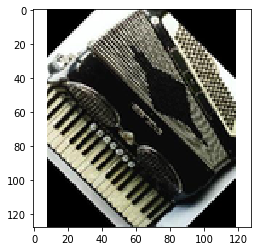

In [0]:
# show image
imgplot = plt.imshow(x_train[0])
plt.show()

In [0]:
y_train[0]

'accordion'

In [0]:
# Transformando las labels de texto a valores numéricos
y = np.unique(y_train)
mapping = { key : value for key,value in zip(y,range(len(y)))}
processed_y = np.array([mapping[i] for i in y_train])

In [0]:
# transformar datos: pasa a one hot encoding
from keras.utils import to_categorical

processed_y_ohe = to_categorical(processed_y)

In [0]:
y

array(['BACKGROUND_Google', 'Faces', 'Faces_easy', 'Leopards',
       'Motorbikes', 'accordion', 'airplanes', 'anchor', 'ant', 'barrel',
       'bass', 'beaver', 'binocular', 'bonsai', 'brain', 'brontosaurus',
       'buddha', 'butterfly', 'camera', 'cannon', 'car_side',
       'ceiling_fan', 'cellphone', 'chair', 'chandelier', 'cougar_body',
       'cougar_face', 'crab', 'crayfish', 'crocodile', 'crocodile_head',
       'cup', 'dalmatian', 'dollar_bill', 'dolphin', 'dragonfly',
       'electric_guitar', 'elephant', 'emu', 'euphonium', 'ewer', 'ferry',
       'flamingo', 'flamingo_head', 'garfield', 'gerenuk', 'gramophone',
       'grand_piano', 'hawksbill', 'headphone', 'hedgehog', 'helicopter',
       'ibis', 'inline_skate', 'joshua_tree', 'kangaroo', 'ketch', 'lamp',
       'laptop', 'llama', 'lobster', 'lotus', 'mandolin', 'mayfly',
       'menorah', 'metronome', 'minaret', 'nautilus', 'octopus', 'okapi',
       'pagoda', 'panda', 'pigeon', 'pizza', 'platypus', 'pyramid',
       'r

In [0]:
print(processed_y[0], processed_y_ohe[0])

5 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]


In [0]:
#n clases
len(y)

102

# ESTRATEGIA 1: Red preentrenada

- Red preentrenada con el dataset: ImageNet.
- Tareas de Transfer Learning para clasificar los objetos de Caltech 101.
- Comparar al menos dos arquitecturas: VGG16, VGG19, ResNet50, Xception, InceptionV3, InceptionResNetV2, MobileNetV2, DenseNet, RasNet; y seleccionar la que mayor precisión nos dé (info sobre arquitecturas en  https://keras.io/applications/)

Se pide emplear la técnica de Transfer Learning, por lo que se importa el Base Model sin ninguna modificación (cualquier tipo de modificación significaría estar haciendo uso de la técnica de Fine Tunning distinta de la pedida).

Cuanto más se parezcan los dominios de los datasets, mejores resultados se obtendrán.

Por paramétrica, el dataset que más parámetros entrenados tiene es el VGG19:

input_shape: optional shape tuple, only to be specified if include_top is False (otherwise the input shape has to be (224, 224, 3) (with 'channels_last' data format) or (3, 224, 224) (with 'channels_first' data format). It should have exactly 3 inputs channels, and width and height should be no smaller than 32. E.g. (200, 200, 3) would be one valid value.

In [0]:
from sklearn.model_selection import train_test_split
x_train_subset, x_test_subset, y_train_subset, y_test_subset = train_test_split(x_train, processed_y_ohe, test_size=0.2, random_state=42)

### VGG16

CARACTERÍSTICAS: 
- Size: 232 MB	
- Top-1 Accuracy: 0.713	
- Accuracy: 0.901	
- Parameters: 138,357,544	
- Depth: 23

In [0]:
# =============================================================================
# IMPORTACIÓN DEL BASE MODEL DE VGG16
# =============================================================================
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                 include_top=False, # incluir la parte densa (fully connected)
                 input_shape=(128,128,3))

conv_base.summary()

58892288/58889256 [==============================] - 2s 0us/step






Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 128, 128, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
________________________________________________________

In [0]:
# =============================================================================
# TOP MODEL
# =============================================================================
# conectarlo a nueva parte densa
from keras import models
from keras import layers

number_of_classes = len(y)

conv_base.trainable = False # evitar que los pesos se modifiquen en la parte convolucional
pre_trained_model = models.Sequential()
pre_trained_model.add(conv_base) # añado el Base Model importado
pre_trained_model.add(layers.Flatten())
pre_trained_model.add(layers.Dropout(0.25)) #dropout
pre_trained_model.add(layers.Dense(256, activation='relu'))
pre_trained_model.add(layers.Dropout(0.5)) #dropout
pre_trained_model.add(layers.Dense(number_of_classes, activation='softmax'))

pre_trained_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_3 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 8192)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dropout_8 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 102)               26214     
Total params: 16,838,310
Trainable params: 2,123,622
Non-trainable params: 14,714,688
__________________________________

In [0]:
# =============================================================================
# COMPILACIÓN
# =============================================================================
pre_trained_model.compile(optimizer='rmsprop',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

### Data Aumentation

Para paliar el overfitting, vamos a incrementar el número de ejemplos ejemplos. Se empleará para ello Data augmentation, que genera datos a partir de los presentes a través de transformaciones geométricas y de intensidad.


In [0]:
# =============================================================================
# DATA AUGMENTATION
# =============================================================================
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10, # grados de rotacion aleatoria
    width_shift_range=0.1, # fraccion del total (1) para mover la imagen
    height_shift_range=0.1, # fraccion del total (1) para mover la imagen
    shear_range=0, # deslizamiento
    zoom_range=0.1, # rango de zoom
    horizontal_flip=True, # girar las imagenes horizontalmente (eje vertical)
    fill_mode='nearest', # como rellenar posibles nuevos pixeles
    channel_shift_range=0.2 # cambios aleatorios en los canales de la imagen
    )

In [0]:
# =============================================================================
# ENTRENAMIENTO
# =============================================================================
# es necesario especificar el numero de steps cuando se usa un generator (para saber cuando dejar de generar datos en una epoca)
batch_size = 64
num_samples = x_train_subset.shape[0] * 2 # multiplicar por 2 el numero de ejemplos

# Fit the model on the batches generated by datagen.flow().
history_pretrained = pre_trained_model.fit_generator(datagen.flow(x_train_subset, y_train_subset, batch_size=batch_size),
                            epochs=10,
                            validation_data=(x_test_subset, y_test_subset),
                            #workers=4,
                            steps_per_epoch=num_samples//batch_size                                          
                            )

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/10
228/228 [==============================] - 61s 270ms/step - loss: 2.6618 - acc: 0.4249 - val_loss: 1.4591 - val_acc: 0.6299
Epoch 2/10
228/228 [==============================] - 58s 256ms/step - loss: 1.6493 - acc: 0.5925 - val_loss: 1.0545 - val_acc: 0.7130
Epoch 3/10
228/228 [==============================] - 57s 252ms/step - loss: 1.3569 - acc: 0.6476 - val_loss: 0.9074 - val_acc: 0.7518
Epoch 4/10
228/228 [==============================] - 58s 252ms/step - loss: 1.1883 - acc: 0.6882 - val_loss: 0.8211 - val_acc: 0.7704
Epoch 5/10
228/228 [==============================] - 57s 250ms/step - loss: 1.1103 - acc: 0.7064 - val_loss: 0.8477 - val_acc: 0.7704
Epoch 6/10
228/228 [==============================] - 57s 249ms/step - loss: 1.0378 - acc: 0.7269 - val_loss: 0.7638 - val_acc: 0.7879
Epoch 7/10
228/228 [==============================] - 57s 251ms/step - loss: 0.9949 - acc: 0.7

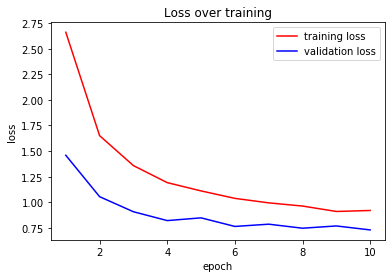

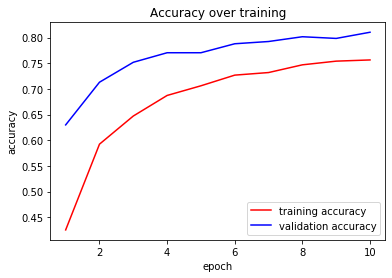

In [0]:
# =============================================================================
# GRÁFICAS
# =============================================================================

#plot loss

epochs = np.arange(1,len(history_pretrained.history['loss'])+1)
plt.title('Loss over training')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(epochs,history_pretrained.history['loss'],'r',label='training loss')
plt.plot(epochs,history_pretrained.history['val_loss'],'b',label='validation loss')
plt.legend(loc='best')
plt.show()

#plot accuracy

epochs = np.arange(1,len(history_pretrained.history['acc'])+1)
plt.title('Accuracy over training')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.plot(epochs,history_pretrained.history['acc'],'r',label='training accuracy')
plt.plot(epochs,history_pretrained.history['val_acc'],'b',label='validation accuracy')
plt.legend(loc='best')
plt.show()

Evaluar el modelo con el set de test

In [0]:
# =============================================================================
# EVALUACIÓN
# =============================================================================
loss, accuracy = pre_trained_model.evaluate(x_test_subset,y_test_subset)

1829/1829 [==============================] - 2s 1ms/step


In [0]:
print('Loss {}, accuracy {}'.format(loss,accuracy))

Loss 0.7298635574166666, accuracy 0.8102788409292535


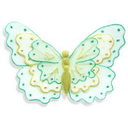

In [0]:
# =============================================================================
# IMAGEN DE NUESTRO SET DE TEST
# =============================================================================
# Tomamos una imagen de nuestro test set aleatoriamente:
from keras.preprocessing import image 

SAMPLE = 122

img = x_test_subset[SAMPLE,:,:,:]

image.array_to_img(img)

In [0]:
# Generamos las predicciones:
predictions = pre_trained_model.predict(img.reshape(1,128,128,3))

predictions

array([[4.92727524e-03, 1.91135161e-08, 6.51578480e-09, 1.44566172e-08,
        5.21598729e-08, 1.95040339e-08, 8.53377785e-12, 5.22156188e-06,
        2.24475189e-05, 3.89010211e-08, 1.32776306e-08, 3.64416303e-10,
        4.84970180e-08, 2.70558353e-09, 1.53639812e-05, 4.09730738e-09,
        1.49896650e-07, 9.94600654e-01, 1.45171644e-11, 8.43518990e-07,
        8.74941531e-14, 2.82585643e-06, 2.22164296e-08, 7.25070265e-07,
        9.09295341e-05, 4.59270427e-10, 1.53835699e-05, 8.52655467e-06,
        2.62976954e-07, 1.10942826e-11, 1.52119428e-11, 1.45620027e-06,
        7.44089164e-07, 8.81277551e-10, 1.11003895e-09, 1.28019834e-04,
        9.59487156e-09, 2.07615281e-09, 3.55539198e-09, 1.04231228e-08,
        1.87325611e-07, 2.06518039e-10, 9.66408180e-08, 1.72861905e-10,
        2.80788839e-07, 6.99523469e-12, 3.91125951e-07, 2.58112443e-09,
        3.76251164e-09, 2.50073384e-07, 2.60277688e-10, 1.28047759e-08,
        1.94273930e-09, 1.26107102e-11, 1.57619751e-09, 3.225350

In [0]:
# La mayor de las probabilidades será la clasificada:
clasification = y[np.argmax(predictions)]
percentage = np.max(predictions)*100

print('El modelo clasifica la imagen en {} con una precisión de {}%'.format(clasification,round(percentage,2)))

El modelo clasifica la imagen en butterfly con una precisión de 99.46%


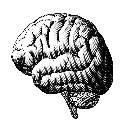

In [0]:
# =============================================================================
# IMAGEN EXTERNA A CUALQUIER SET
# =============================================================================
# cargar imagen 
img2 = image.load_img(BASE_FOLDER+'brain.jpg', target_size=(128,128))
x = image.img_to_array(img2) # a array de (128,128,3)
x = np.expand_dims(x, axis=0) # a array de (1,128,128,3)
img2


In [0]:
# Generamos las predicciones:
predictions = pre_trained_model.predict(x)

predictions

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
clasification = y[np.argmax(predictions)]
percentage = np.max(predictions)*100

print('El modelo clasifica la imagen en {} con una precisión de {}%'.format(clasification,round(percentage,2)))

El modelo clasifica la imagen en brain con una precisión de 100.0%


# VGG19

CARACTERÍSTICAS: 
- Size: 549 MB		
- Top-1 Accuracy: 0.713	
- Top-5 Accuracy: 0.900	
- Parameters: 143,667,240	
- Depth: 16

In [0]:
# =============================================================================
# IMPORTACIÓN DEL BASE MODEL DE VGG19
# =============================================================================
from keras.applications import VGG19

conv_base_2 = VGG19(weights='imagenet',
                        include_top=False, # incluir la parte densa (fully connected)
                        input_shape=(128,128,3))

conv_base_2.summary()

80142336/80134624 [==============================] - 3s 0us/step
Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 128, 128, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
______________________________________________________________

In [0]:
# =============================================================================
# TOP MODEL
# =============================================================================
from keras import models
from keras import layers

number_of_classes = len(y)

conv_base_2.trainable = False # evitar que los pesos se modifiquen en la parte convolucional
pre_trained_model_2 = models.Sequential()
pre_trained_model_2.add(conv_base_2) # añado el Base Model importado
pre_trained_model_2.add(layers.Flatten())
pre_trained_model_2.add(layers.Dropout(0.25)) #dropout
pre_trained_model_2.add(layers.Dense(512, activation='relu'))
pre_trained_model_2.add(layers.Dropout(0.5)) #dropout
pre_trained_model_2.add(layers.Dense(number_of_classes, activation='softmax'))

pre_trained_model_2.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Model)                (None, 4, 4, 512)         20024384  
_________________________________________________________________
flatten_4 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 8192)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               4194816   
_________________________________________________________________
dropout_10 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 102)               52326     
Total params: 24,271,526
Trainable params: 4,247,142
Non-trainable params: 20,024,384
__________________________________

In [0]:
# =============================================================================
# COMPILACIÓN
# =============================================================================
pre_trained_model_2.compile(optimizer='rmsprop',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

In [0]:
# =============================================================================
# ENTRENAMIENTO
# =============================================================================
# es necesario especificar el numero de steps cuando se usa un generator (para saber cuando dejar de generar datos en una epoca)
batch_size = 64
num_samples = x_train_subset.shape[0] * 3 # multiplicar por 3 el numero de ejemplos

# Fit the model on the batches generated by datagen.flow().
history_pretrained_2 = pre_trained_model_2.fit_generator(datagen.flow(x_train_subset, y_train_subset, batch_size=batch_size),
                            epochs=10,
                            validation_data=(x_test_subset, y_test_subset),
                            steps_per_epoch=num_samples//batch_size                                          
                            )

Epoch 1/10
342/342 [==============================] - 88s 259ms/step - loss: 2.4231 - acc: 0.4634 - val_loss: 1.2125 - val_acc: 0.6938
Epoch 2/10
342/342 [==============================] - 87s 255ms/step - loss: 1.4538 - acc: 0.6305 - val_loss: 0.9387 - val_acc: 0.7485
Epoch 3/10
342/342 [==============================] - 87s 254ms/step - loss: 1.2323 - acc: 0.6756 - val_loss: 0.8230 - val_acc: 0.7769
Epoch 4/10
342/342 [==============================] - 86s 250ms/step - loss: 1.1296 - acc: 0.7074 - val_loss: 0.8080 - val_acc: 0.7786
Epoch 5/10
342/342 [==============================] - 86s 251ms/step - loss: 1.0571 - acc: 0.7227 - val_loss: 0.7981 - val_acc: 0.7829
Epoch 6/10
342/342 [==============================] - 86s 251ms/step - loss: 1.0172 - acc: 0.7312 - val_loss: 0.8182 - val_acc: 0.7857
Epoch 7/10
342/342 [==============================] - 86s 252ms/step - loss: 0.9836 - acc: 0.7413 - val_loss: 0.8499 - val_acc: 0.7906
Epoch 8/10
342/342 [==============================] - 8

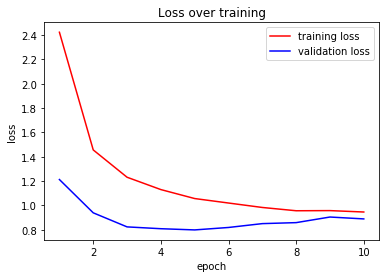

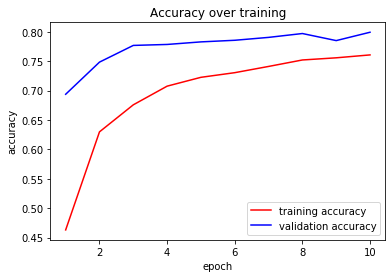

In [0]:
# =============================================================================
# GRÁFICAS
# =============================================================================

#plot loss

epochs = np.arange(1,len(history_pretrained_2.history['loss'])+1)
plt.title('Loss over training')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(epochs,history_pretrained_2.history['loss'],'r',label='training loss')
plt.plot(epochs,history_pretrained_2.history['val_loss'],'b',label='validation loss')
plt.legend(loc='best')
plt.show()

#plot accuracy

epochs = np.arange(1,len(history_pretrained_2.history['acc'])+1)
plt.title('Accuracy over training')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.plot(epochs,history_pretrained_2.history['acc'],'r',label='training accuracy')
plt.plot(epochs,history_pretrained_2.history['val_acc'],'b',label='validation accuracy')
plt.legend(loc='best')
plt.show()

In [0]:
# =============================================================================
# EVALUACIÓN
# =============================================================================
loss, accuracy = pre_trained_model_2.evaluate(x_test_subset,y_test_subset)

1829/1829 [==============================] - 2s 1ms/step


In [0]:
print('Loss {}, accuracy {}'.format(loss,accuracy))

Loss 0.888660890538553, accuracy 0.799343903805142


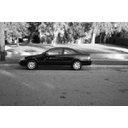

In [0]:
# =============================================================================
# IMAGEN DE NUESTRO SET DE TEST
# =============================================================================
# Tomamos una imagen de nuestro test set aleatoriamente:
from keras.preprocessing import image 

SAMPLE = 977

img = x_test_subset[SAMPLE,:,:,:]

image.array_to_img(img)

In [0]:
# Generamos las predicciones:
predictions = pre_trained_model_2.predict(img.reshape(1,128,128,3))

# La mayor de las probabilidades será la clasificada:
clasification = y[np.argmax(predictions)]
percentage = np.max(predictions)*100

print('El modelo clasifica la imagen en {} con una precisión de {}%'.format(clasification,round(percentage,2)))

El modelo clasifica la imagen en car_side con una precisión de 100.0%


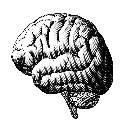

In [0]:
# =============================================================================
# IMAGEN EXTERNA A CUALQUIER SET
# =============================================================================
# cargar imagen 
img2 = image.load_img(BASE_FOLDER+'brain.jpg', target_size=(128,128))
x = image.img_to_array(img2) # a array de (128,128,3)
x = np.expand_dims(x, axis=0) # a array de (1,128,128,3)
img2

In [0]:
# Generamos las predicciones:
predictions = pre_trained_model_2.predict(x)

# Clasificamos:
clasification = y[np.argmax(predictions)]
percentage = np.max(predictions)*100

print('El modelo clasifica la imagen en {} con una precisión de {}%'.format(clasification,round(percentage,2)))

El modelo clasifica la imagen en brain con una precisión de 100.0%


# Estrategia 2: Entrenar desde cero

Diseño, entrenamiento y optimización de una red neuronal.

### ARQUITECTURA

BASE MODEL:

Para nuestra Base Model se aplicarán tres bloques convolucionales. A mayor número de bloques, mayor profundidad de la red y más capacitada estará para extraer características locales -mayor precisión-.

Se aplicarán filtros tamaño 3x3 de depth ascendente (32 filtros, 64 filtros...) -dado que cada vez que extraemos información en x e y la introducimos en z-.

Se hará uso de técnicas de pooling con la finalidad de reducir dimensionalidad sin perder información relevante.

También se introducirá Dropout como medida para mitigar overfitting.

El parámetro padding='same' en Conv2D se emplea para igualar tamaño al input original. En este caso se probó pero no mejoraba la red.


TOP MODEL:

Se aplicará una capa flatten y capas densas -fullyconnected-, especificando en la última de las capas tantas neuronas como clases existentes. La activación será 'softmax'. Ésta es la manera de proceder para clasificación multiclase.

In [0]:
# =============================================================================
# ARQUITECTURA
# =============================================================================
from keras import models
from keras import layers

#MODO SECUENCIAL
own_convnet = models.Sequential()

#BLOQUE CONVOLUCIONAL 1 (BASE MODEL)
own_convnet.add(layers.Conv2D(32,(3,3),activation='relu', input_shape=(128,128,3)))
own_convnet.add(layers.Conv2D(32,(3,3),activation='relu'))
own_convnet.add(layers.MaxPooling2D((2,2)))
own_convnet.add(layers.Dropout(0.25))

#BLOQUE CONVOLUCIONAL 2 (BASE MODEL)
own_convnet.add(layers.Conv2D(64,(3,3),activation='relu'))
own_convnet.add(layers.Conv2D(64,(3,3),activation='relu'))
own_convnet.add(layers.MaxPooling2D((2,2)))
own_convnet.add(layers.Dropout(0.25))

#BLOQUE CONVOLUCIONAL 3 (BASE MODEL)
own_convnet.add(layers.Conv2D(128,(3,3),activation='relu'))
own_convnet.add(layers.Conv2D(128,(3,3),activation='relu'))
own_convnet.add(layers.MaxPooling2D((2,2)))
own_convnet.add(layers.Dropout(0.25))

#TOP MODEL
own_convnet.add(layers.Flatten())
own_convnet.add(layers.Dense(64,activation='relu'))
own_convnet.add(layers.Dense(number_of_classes,activation='softmax'))

### COMPILACIÓN

- 'rmsprop': optimizador para calcular o retropropagar los errores
- 'categorical_crossentropy': para clasificación multiclase
- 'accuracy': métrica a monitorizar para conocer cuán fructífero está resultando el entrenamiento.

In [0]:
# =============================================================================
# COMPILACIÓN
# =============================================================================
own_convnet.compile(optimizer='rmsprop',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

### DATA AUGMENTATION

A través de transformaciones geométricas y de intensidad de las imágenes originales, se crearán otras imágenes para entrenar.

Se entrenarán con estas nuevas imágenes, no con las originales.

In [0]:
# =============================================================================
# DATA AUGMENTATION
# =============================================================================
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10, # grados de rotacion aleatoria
    width_shift_range=0.1, # fraccion del total (1) para mover la imagen
    height_shift_range=0.1, # fraccion del total (1) para mover la imagen
    shear_range=0, # deslizamiento
    zoom_range=0.1, # rango de zoom
    horizontal_flip=True, # girar las imagenes horizontalmente (eje vertical)
    fill_mode='nearest', # como rellenar posibles nuevos pixeles
    channel_shift_range=0.2 # cambios aleatorios en los canales de la imagen
)

### ENTRENAMIENTO

Aquí se puede jugar ampliamente con los parámetros batch_size, epochs y num_samples.

Dadas las limitaciones actuales, no se será muy ambicioso con estos valores. Por ejemplo, podríamos tomar un num_samples (las imágenes que se crean mediante las transformaciones) elevado, pero se prefiere tomar una medida más modesta para no relentizar los cálculos.

Un batch size muy alto dará pasos más grandes pero convergerá proablemente lejos del punto óptimo. Un batch size pequeño tiende a una buena convergencia pero relentiza el tiempo de computación. Se especificará el batch size en función del nivel de detalle que requiera la aplicación y el procesador que se emplee. También existen técnicas que emplean un batch size alto que va disminuyendo gradualmente.

In [0]:
# =============================================================================
# ENTRENAMIENTO
# =============================================================================
# es necesario especificar el numero de steps cuando se usa un generator (para saber cuando dejar de generar datos en una epoca)
batch_size = 64
num_samples = x_train_subset.shape[0] * 5 # multiplicar por 5 el numero de ejemplos

# Fit the model on the batches generated by datagen.flow().
own_history = own_convnet.fit_generator(datagen.flow(x_train_subset, y_train_subset, batch_size=batch_size),
                            epochs=10,
                            validation_data=(x_test_subset, y_test_subset),
                            steps_per_epoch=num_samples//batch_size                                          
                            )

Epoch 1/10
571/571 [==============================] - 142s 249ms/step - loss: 3.5149 - acc: 0.2514 - val_loss: 2.7451 - val_acc: 0.3876
Epoch 2/10
571/571 [==============================] - 142s 248ms/step - loss: 2.3441 - acc: 0.4499 - val_loss: 2.1651 - val_acc: 0.4932
Epoch 3/10
571/571 [==============================] - 142s 249ms/step - loss: 1.8267 - acc: 0.5488 - val_loss: 1.7697 - val_acc: 0.5796
Epoch 4/10
571/571 [==============================] - 142s 248ms/step - loss: 1.5222 - acc: 0.6077 - val_loss: 1.5637 - val_acc: 0.6288
Epoch 5/10
571/571 [==============================] - 142s 248ms/step - loss: 1.3110 - acc: 0.6578 - val_loss: 1.5254 - val_acc: 0.6359
Epoch 6/10
571/571 [==============================] - 141s 247ms/step - loss: 1.1551 - acc: 0.6934 - val_loss: 1.3038 - val_acc: 0.6927
Epoch 7/10
571/571 [==============================] - 142s 248ms/step - loss: 1.0163 - acc: 0.7245 - val_loss: 1.3157 - val_acc: 0.6916
Epoch 8/10
571/571 [============================

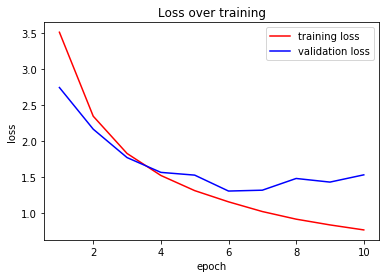

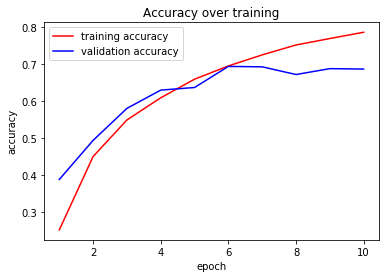

In [0]:
# =============================================================================
# GRÁFICAS
# =============================================================================

#plot loss

epochs = np.arange(1,len(own_history.history['loss'])+1)
plt.title('Loss over training')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(epochs,own_history.history['loss'],'r',label='training loss')
plt.plot(epochs,own_history.history['val_loss'],'b',label='validation loss')
plt.legend(loc='best')
plt.show()

#plot accuracy

epochs = np.arange(1,len(own_history.history['acc'])+1)
plt.title('Accuracy over training')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.plot(epochs,own_history.history['acc'],'r',label='training accuracy')
plt.plot(epochs,own_history.history['val_acc'],'b',label='validation accuracy')
plt.legend(loc='best')
plt.show()

In [0]:
# =============================================================================
# EVALUACIÓN
# =============================================================================
loss, accuracy = own_convnet.evaluate(x_test_subset,y_test_subset)

1829/1829 [==============================] - 1s 451us/step


In [0]:
print('Loss {}, accuracy {}'.format(loss,accuracy))

Loss 1.529397657492436, accuracy 0.6856205577469706


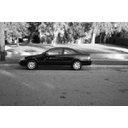

In [0]:
# =============================================================================
# IMAGEN DE NUESTRO SET DE TEST
# =============================================================================
# Tomamos una imagen de nuestro test set aleatoriamente:
from keras.preprocessing import image 

SAMPLE = 977

img = x_test_subset[SAMPLE,:,:,:]

image.array_to_img(img)

In [0]:
# Generamos las predicciones:
predictions = own_convnet.predict(img.reshape(1,128,128,3))

# La mayor de las probabilidades será la clasificada:
clasification = y[np.argmax(predictions)]
percentage = np.max(predictions)*100

print('El modelo clasifica la imagen en {} con una precisión de {}%'.format(clasification,round(percentage,2)))

El modelo clasifica la imagen en car_side con una precisión de 74.84%


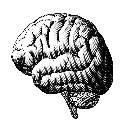

In [0]:
# =============================================================================
# IMAGEN EXTERNA A CUALQUIER SET
# =============================================================================
# cargar imagen 
img2 = image.load_img(BASE_FOLDER+'brain.jpg', target_size=(128,128))
x = image.img_to_array(img2) # a array de (128,128,3)
x = np.expand_dims(x, axis=0) # a array de (1,128,128,3)
img2

In [0]:
# Generamos las predicciones:
predictions = own_convnet.predict(x)

# Clasificamos:
clasification = y[np.argmax(predictions)]
percentage = np.max(predictions)*100

print('El modelo clasifica la imagen en {} con una precisión de {}%'.format(clasification,round(percentage,2)))

El modelo clasifica la imagen en BACKGROUND_Google con una precisión de 100.0%
